# Connect to Google Drive

In [ ]:
# You need to download the Diabetics dataset at: https://www.kaggle.com/datasets/kandij/diabetes-dataset/data
# Use Google Drive as Data Storage
from google.colab import drive
drive.mount('/content/gdrive')

!ls -l ./gdrive/MyDrive/Colab\ Notebooks/datasets

Mounted at /content/gdrive
total 24
-rw------- 1 root root 23875 Oct 17 04:57 diabetes2.csv


# Load Data

In [ ]:
import pandas as pd

# load data from "diabetes2.csv" file located on google drive
rawdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/diabetes2.csv')

In [ ]:
# display the top rows
rawdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# get a quick description of the data, including # of rows, # of features, name of each feature, type of each feature, # of non-null values
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# show a summary of the numerical attributes
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#  Task 1: Preprocess Data

In [ ]:
rawdata = rawdata.drop_duplicates()

data = rawdata.drop("Outcome", axis=1, inplace = False).astype(float)
target = rawdata["Outcome"].copy()
print(data.shape, " ", target.shape)


(768, 8)   (768,)


# Task 2: Split Dataset for Training, Validation, and Testing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Feature scaling: cited directly from posted screenshot
pipe = Pipeline([
    ("std_scalar", StandardScaler())
])

scaled_data = pipe.fit_transform(data)
scaled_target = target.values

#Test train split using the preprocessed data.

train_data, valid_data, train_target, valid_target = train_test_split(scaled_data, (scaled_target [:, np.newaxis]), test_size = .2, random_state = 43)
train_data, test_data, train_target, test_target = train_test_split(train_data, train_target, test_size = .25, random_state = 43)

print("Total values in each split:")
print("train data:", train_data.shape, "train target:", train_target.shape)
print("valid data:", valid_data.shape, "valid target:", valid_target.shape)
print("test data:", test_data.shape, "test target:", test_target.shape)






Total values in each split:
train data: (460, 8) train target: (460, 1)
valid data: (154, 8) valid target: (154, 1)
test data: (154, 8) test target: (154, 1)


# Task 3: Use Logistic Regression using Scikit-learn

In [267]:
from sklearn.linear_model import LogisticRegression

logReg= LogisticRegression()
logReg.fit(train_data, train_target)

print("SKLEARN coefficients: \n", logReg.coef_)
print("SKLEARN Intercept: ", logReg.intercept_, "\n")

from sklearn.metrics import log_loss
print("Training Loss using SKLEARN - log_loss: %.2f" % (log_loss(train_target, logReg.predict_proba(train_data))))
print("Validation Loss using SKLEARN - log_loss: %.2f" % (log_loss(valid_target, logReg.predict_proba(valid_data))))
print("Testing Loss using SKLEARN - log_loss: %.2f" % (log_loss(test_target, logReg.predict_proba(test_data))))

from sklearn.metrics import confusion_matrix
predictions = logReg.predict(test_data)
confusion_matrix(test_target, predictions)


SKLEARN coefficients: 
 [[ 0.43702471  1.06571826 -0.33425353 -0.06010718 -0.00265243  0.69923667
   0.34497733  0.03859856]]
SKLEARN Intercept:  [-0.84365664] 

Training Loss using SKLEARN - log_loss: 0.48
Validation Loss using SKLEARN - log_loss: 0.52
Testing Loss using SKLEARN - log_loss: 0.41


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[94,  9],
       [20, 31]])

# Task 4: Implement stochastic gradient descent method to perform logistic regression

intercept:  [-0.8148883]
weights: 
 [[ 0.43344912]
 [ 1.09189588]
 [-0.29888084]
 [-0.03438341]
 [ 0.00309247]
 [ 0.71745507]
 [ 0.31987372]
 [ 0.06254574]]
my training loss:  0.48269908907695575
sklearn train loss:  0.48269908907695575
my valid loss:  0.5135734191726696
sklearn valid loss:  0.5135734191726696
my test loss:  0.4075953737273621
sklearn test loss:  0.4075953737273621


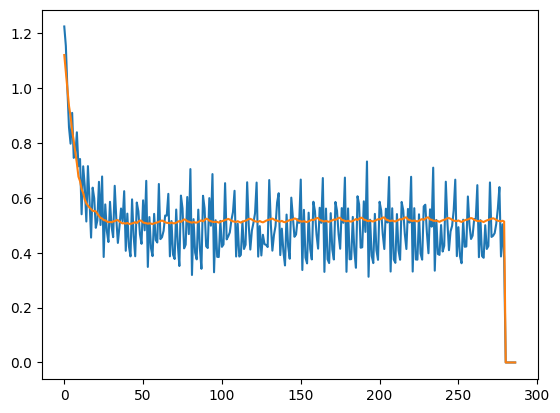

In [272]:
#this is my part 4 implemenation.


#neccesary imports

import math
import random
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt

#CLASS CONSTANTS. MAY BE ALTERED TO TWEAK RESULTS
batch_size = 32
epochs = 20
learning_rate = .25

#ADDING INTERCEPTS TO DATASETS
train_data_intercept = np.insert(train_data, 0, 1, axis = 1)
valid_data_intercept = np.insert(valid_data, 0, 1, axis = 1)
test_data_intercept = np.insert(test_data, 0, 1, axis = 1)


#MY MODEL FUNCTION
def myModelFunction(X, w):
    return sigmoidFunction(np.dot(X,w))

#SIGMOID FUNCTION USED THROUGHOUT
def sigmoidFunction(x):
    return 1/(1 + np.exp(-x))

#MY LOSS FUNCTION: LOG LOSS IMPLEMENTATION
def myLossFunction(X, w, y):
    prediction = myModelFunction(X,w)
    loss = -1* np.sum( (y * np.log(prediction) + ((1 - y) * np.log((1 - prediction)) )))/ X.shape[0]
    return loss

#MY TRAINING LOOP. BEGINS TRAIN LOOP
def myStochasticTrainingLoop(train_data, train_target, valid_data, valid_target, epochs, batch_size):
    totDataPoints = int( epochs * (train_data.shape[0] / batch_size))
    train_loss_tracker = np.zeros(((totDataPoints),1))
    valid_loss_tracker = np.zeros(((totDataPoints),1))
    w = np.random.normal(0,1,(train_data.shape[1],1))
    j = 0
    x = 2
    counter = 0

    for i in range(epochs):
        while j <= train_data.shape[0]:
            if(j + batch_size < train_data.shape[0]):
                Xw = np.dot(train_data[j:(j+batch_size)], w)
                rhs = (train_target[j:j+batch_size]-sigmoidFunction(Xw))
                grad  = -1/batch_size * (np.dot(train_data[j:(j+batch_size)].T,rhs))
                w = w + learning_rate*(-1*grad)

                train_loss_tracker[counter] = myLossFunction(train_data[j:(j+batch_size)], w, train_target[j:(j+batch_size)])

                valid_loss_tracker[counter] = myLossFunction(valid_data, w, valid_target)

                counter +=1
            j = j + batch_size
        x = random.randint(0,10)
        j = x
        i+=1


    return w, train_loss_tracker, valid_loss_tracker




#CALLING THE FUNCTIONS
w, trainTrack, validTrack = myStochasticTrainingLoop(train_data_intercept, train_target, valid_data_intercept, valid_target, epochs, batch_size)


print("intercept: ", w[0])
print("weights: \n", w[1:10])
print("my training loss: ", myLossFunction(train_data_intercept, w, train_target))
print("sklearn train loss: ", log_loss(train_target, myModelFunction(train_data_intercept,w)))
print("my valid loss: ", myLossFunction(valid_data_intercept, w, valid_target))
print("sklearn valid loss: ", log_loss(valid_target, myModelFunction(valid_data_intercept,w)))

print("my test loss: ", myLossFunction(test_data_intercept, w, test_target))
print("sklearn test loss: ", log_loss(test_target, myModelFunction(test_data_intercept,w)))

totDataPoints = int( epochs * (train_data.shape[0] / batch_size))
#print(trainTrack)
plt.plot(np.arange(totDataPoints), trainTrack, label = "Training error")
plt.plot(np.arange(totDataPoints), validTrack, label = "Validation error")


